In [2]:
import tensorflow as tf
import tensorflow.python.platform.build_info as build

tf.__version__

'2.17.1'

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt

import plotly
import plotly.graph_objs as go

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle as p

to_categorical = tf.keras.utils.to_categorical
mnist = tf.keras.datasets.mnist
load_model = tf.keras.models.load_model
model_from_json = tf.keras.models.model_from_json

In [5]:
pip install plotly

**STEP 1 DATA PREPARATION**

In [28]:
batch_size = 128
num_classes = 10
epochs = 5

img_rows, img_cols = 28, 28

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [30]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [31]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

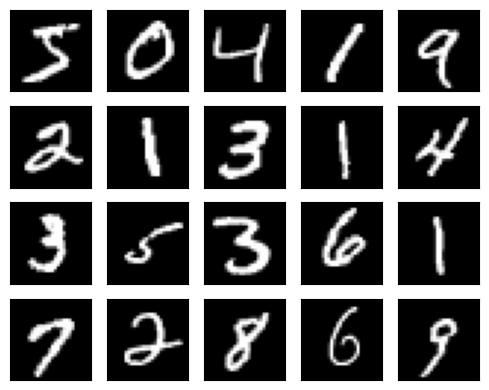

In [32]:
plt.figure(figsize=(5,4))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.savefig('mnist.png', dpi=300)

In [33]:
x_train.min(), x_train.max()

(0, 255)

In [34]:
temp_x_test = x_test

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test.shape:', x_test.shape)
print(x_train.min(), x_train.max())

x_train shape: (60000, 28, 28, 1)
x_test.shape: (10000, 28, 28, 1)
0.0 1.0


In [35]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

**STEP 2 DEFINE MODEL**

In [36]:
#Feature Extraction
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

#Image Classification
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

**STEP 3 COMPILE**

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

**STEP 4 FIT (TRAIN)**

In [38]:
start = time.time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

done = time.time()
print(done - start)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 192s 336ms/step - accuracy: 0.8488 - loss: 0.4894 - val_accuracy: 0.9842 - val_loss: 0.0523
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 338ms/step - accuracy: 0.9728 - loss: 0.0880 - val_accuracy: 0.9866 - val_loss: 0.0397
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 159s 339ms/step - accuracy: 0.9796 - loss: 0.0666 - val_accuracy: 0.9887 - val_loss: 0.0317
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 198s 331ms/step - accuracy: 0.9837 - loss: 0.0526 - val_accuracy: 0.9903 - val_loss: 0.0311
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 205s 338ms/step - accuracy: 0.9855 - loss: 0.0470 - val_accuracy: 0.9907 - val_loss: 0.0298
956.8966114521027


**STEP 5 SAVE MODEL**

In [39]:
filepath_history_model = 'history_model'

with open(filepath_history_model, 'wb') as file:p.dump(history.history,file)

In [40]:
filepath = 'model.h5'
model.save(filepath)

In [41]:
filepath_model = 'model.json'
# filepath_weights = 'weights_medel.h5'
filepath_weights = 'weights_model.weights.h5'

model_json = model.to_json()
with open(filepath_model, "w") as json_file:json_file.write(model_json)
model.save_weights(filepath_weights)

**STEP 6 LOAD MODEL**

In [42]:
with open(filepath_history_model, 'rb') as file:history = p.load(file)

In [43]:
h1 = go.Scatter(y=history['loss'], mode="lines", line=dict(width=2, color='blue'), name="loss")
h2 = go.Scatter(y=history['val_loss'], mode="lines", line=dict(width=2, color='red'), name="val_loss")

data = [h1,h2]
layout1 = go.Layout(title='Loss', xaxis=dict(title='epoch'), yaxis=dict(title=' '))
fig1 = go.Figure(data, layout=layout1)
plotly.offline.iplot(fig1, filename='testMNIST')

In [44]:
predict_model = load_model(filepath)
predict_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,884 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [45]:
with open(filepath_model, 'r') as file:
  loaded_model_json = file.read()
  predict_model = model_from_json(loaded_model_json)
  predict_model.load_weights(filepath_weights)
predict_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

predict_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning:

Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

**STEP 7 PREDICTION**

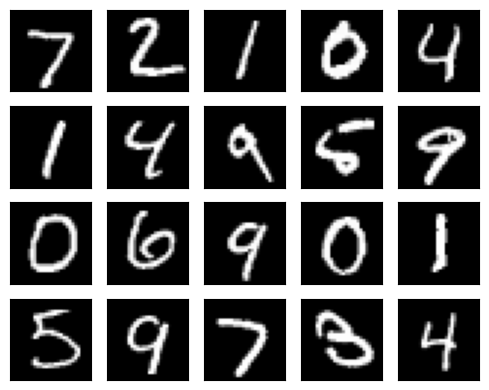

In [46]:
plt.figure(figsize=(5,4))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(temp_x_test[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.savefig('mnist.png', dpi=300)

In [47]:
rusult = predict_model.predict(x_test[:1])
result = np.argmax(rusult, axis=-1)

print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[7]


**STEP 8 EVALUATON**

In [48]:
score = predict_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029816564172506332
Test accuracy: 0.9907000064849854


In [49]:
predicted_classes = predict_model.predict(x_test)
predicted_classes = np.argmax(predicted_classes, axis=-1)
y_true = np.argmax(y_test, axis=-1)
correct = np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]

print('Correct predocted classes: ', correct.shape[0])
print('Incorrect predocted classes: ', incorrect.shape[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
Correct predocted classes:  9907
Incorrect predocted classes:  93


In [50]:
confusion_matrix(y_true, predicted_classes)

array([[ 976,    0,    0,    0,    0,    0,    3,    1,    0,    0],
       [   0, 1132,    1,    2,    0,    0,    0,    0,    0,    0],
       [   1,    2, 1023,    0,    1,    0,    0,    5,    0,    0],
       [   0,    0,    1, 1006,    0,    1,    0,    1,    1,    0],
       [   0,    0,    0,    0,  975,    0,    1,    0,    1,    5],
       [   2,    0,    0,    9,    0,  880,    1,    0,    0,    0],
       [   3,    2,    0,    0,    1,    2,  950,    0,    0,    0],
       [   1,    1,    7,    2,    0,    0,    0, 1015,    1,    1],
       [   4,    0,    4,    0,    0,    0,    1,    2,  962,    1],
       [   0,    2,    0,    3,    4,    1,    0,    4,    7,  988]])

In [51]:
labels ={0 : "zero", 1 : "one", 2 : "two", 3 : "three", 4 : "four", 5 : "five", 6 : "six", 7 : "seven", 8 : "eight", 9 : "nine"}

target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names, digits=4))

                   precision    recall  f1-score   support

 Class 0 (zero) :     0.9889    0.9959    0.9924       980
  Class 1 (one) :     0.9939    0.9974    0.9956      1135
  Class 2 (two) :     0.9875    0.9913    0.9894      1032
Class 3 (three) :     0.9843    0.9960    0.9902      1010
 Class 4 (four) :     0.9939    0.9929    0.9934       982
 Class 5 (five) :     0.9955    0.9865    0.9910       892
  Class 6 (six) :     0.9937    0.9916    0.9927       958
Class 7 (seven) :     0.9874    0.9874    0.9874      1028
Class 8 (eight) :     0.9897    0.9877    0.9887       974
 Class 9 (nine) :     0.9930    0.9792    0.9860      1009

         accuracy                         0.9907     10000
        macro avg     0.9908    0.9906    0.9907     10000
     weighted avg     0.9907    0.9907    0.9907     10000

